## CREDIT RISK ANALYSIS AT QUICKCHECK

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
await piplite.install(['plotly', "dash"])

In [2]:
await piplite.install(['scikit-learn'])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px
from dash import dash, html, dcc, Input, Output, callback
from sklearn.metrics import confusion_matrix

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_name="IBM-DS0321EN-SkillsNetwork/labs/module_2/users.csv"

In [6]:
await download(file_name, "users.csv")
file_name="users.csv"

## TASK 1

In [7]:
users_df = pd.read_csv(file_name)
users_df.head()

,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,state,payment_system,origin,professional_category,email_is_validated
0,2559701,male,500000.0,19/04/1995,2.0,6.0,uba,7000000.0,0.0,False,Ekiti,3,2,2.0,False
1,2682567,male,500000.0,10/01/1997,1.0,1.0,access,20000000.0,0.0,False,Lagos,3,1,2.0,False
2,2303641,male,200000.0,27/07/1986,1.0,1.0,unionBank,5000000.0,NaN,False,Abuja,3,2,4.0,False
3,2445202,male,100000.0,28/02/1988,1.0,0.0,sterling,5000000.0,2.0,False,Ogun,3,2,7.0,False
4,2472685,female,500000.0,10/02/1987,2.0,0.0,gtb,13700000.0,NaN,False,Ogun,3,2,7.0,False


In [8]:
missing_values = users_df.isnull().sum()
missing_values

user_id                      0
gender                       9
avg_airtime              12250
date_of_birth               28
education_status         13775
employment_status            9
bank                     11456
monthly_income              10
number_children          27276
owns_car                     0
state                        9
payment_system               0
origin                       0
professional_category    41830
email_is_validated           0
dtype: int64

##### There were a lot of missing values from avg_airtime, education_status, bank, number_children and professional_category. 
##### For variables like gender, data of birth, state - A system can be implemented to extract these from the customers upon registration. 

In [9]:
duplicate_rows = users_df[users_df.duplicated()]
duplicate_rows

,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,state,payment_system,origin,professional_category,email_is_validated


##### There are no duplicate values. 

In [10]:
num_summary = users_df.describe()
num_summary

,user_id,avg_airtime,education_status,employment_status,monthly_income,number_children,payment_system,origin,professional_category
count,2.986340e+05,2.863840e+05,284859.000000,298625.000000,2.986240e+05,271358.000000,298634.000000,298634.000000,256804.000000
mean,2.629420e+06,1.104947e+10,1.708765,1.962478,5.283974e+10,1.257825,2.963239,1.259351,4.916606
std,2.004167e+05,2.287844e+12,0.470376,2.114340,1.731368e+13,2.947242,0.269243,0.473252,2.155891
min,2.302281e+06,-5.000000e+04,0.000000,0.000000,-5.000000e+06,-4.000000,1.000000,1.000000,0.000000
25%,2.453724e+06,2.000000e+05,1.000000,1.000000,4.500000e+06,0.000000,3.000000,1.000000,4.000000
50%,2.612142e+06,5.000000e+05,2.000000,1.000000,7.000000e+06,1.000000,3.000000,1.000000,6.000000
75%,2.810903e+06,8.000000e+05,2.000000,4.000000,1.300000e+07,2.000000,3.000000,2.000000,7.000000
max,2.990029e+06,1.000000e+15,2.000000,7.000000,8.000000e+15,100.000000,4.000000,7.000000,7.000000


##### There should be a classification system key to know what the numerical variables mean

In [11]:
lower_limit = 0  
upper_limit = 1000000 
income_range_df = users_df[(users_df['monthly_income'] >= lower_limit) & (users_df['monthly_income'] <= upper_limit)] 
count_customers_in_range = len(income_range_df)

#### MONTHLY INCOME DISTRIBUTION

#### A range of monthly salary from 0 to 10 million will be used to perform our distribution analysis.

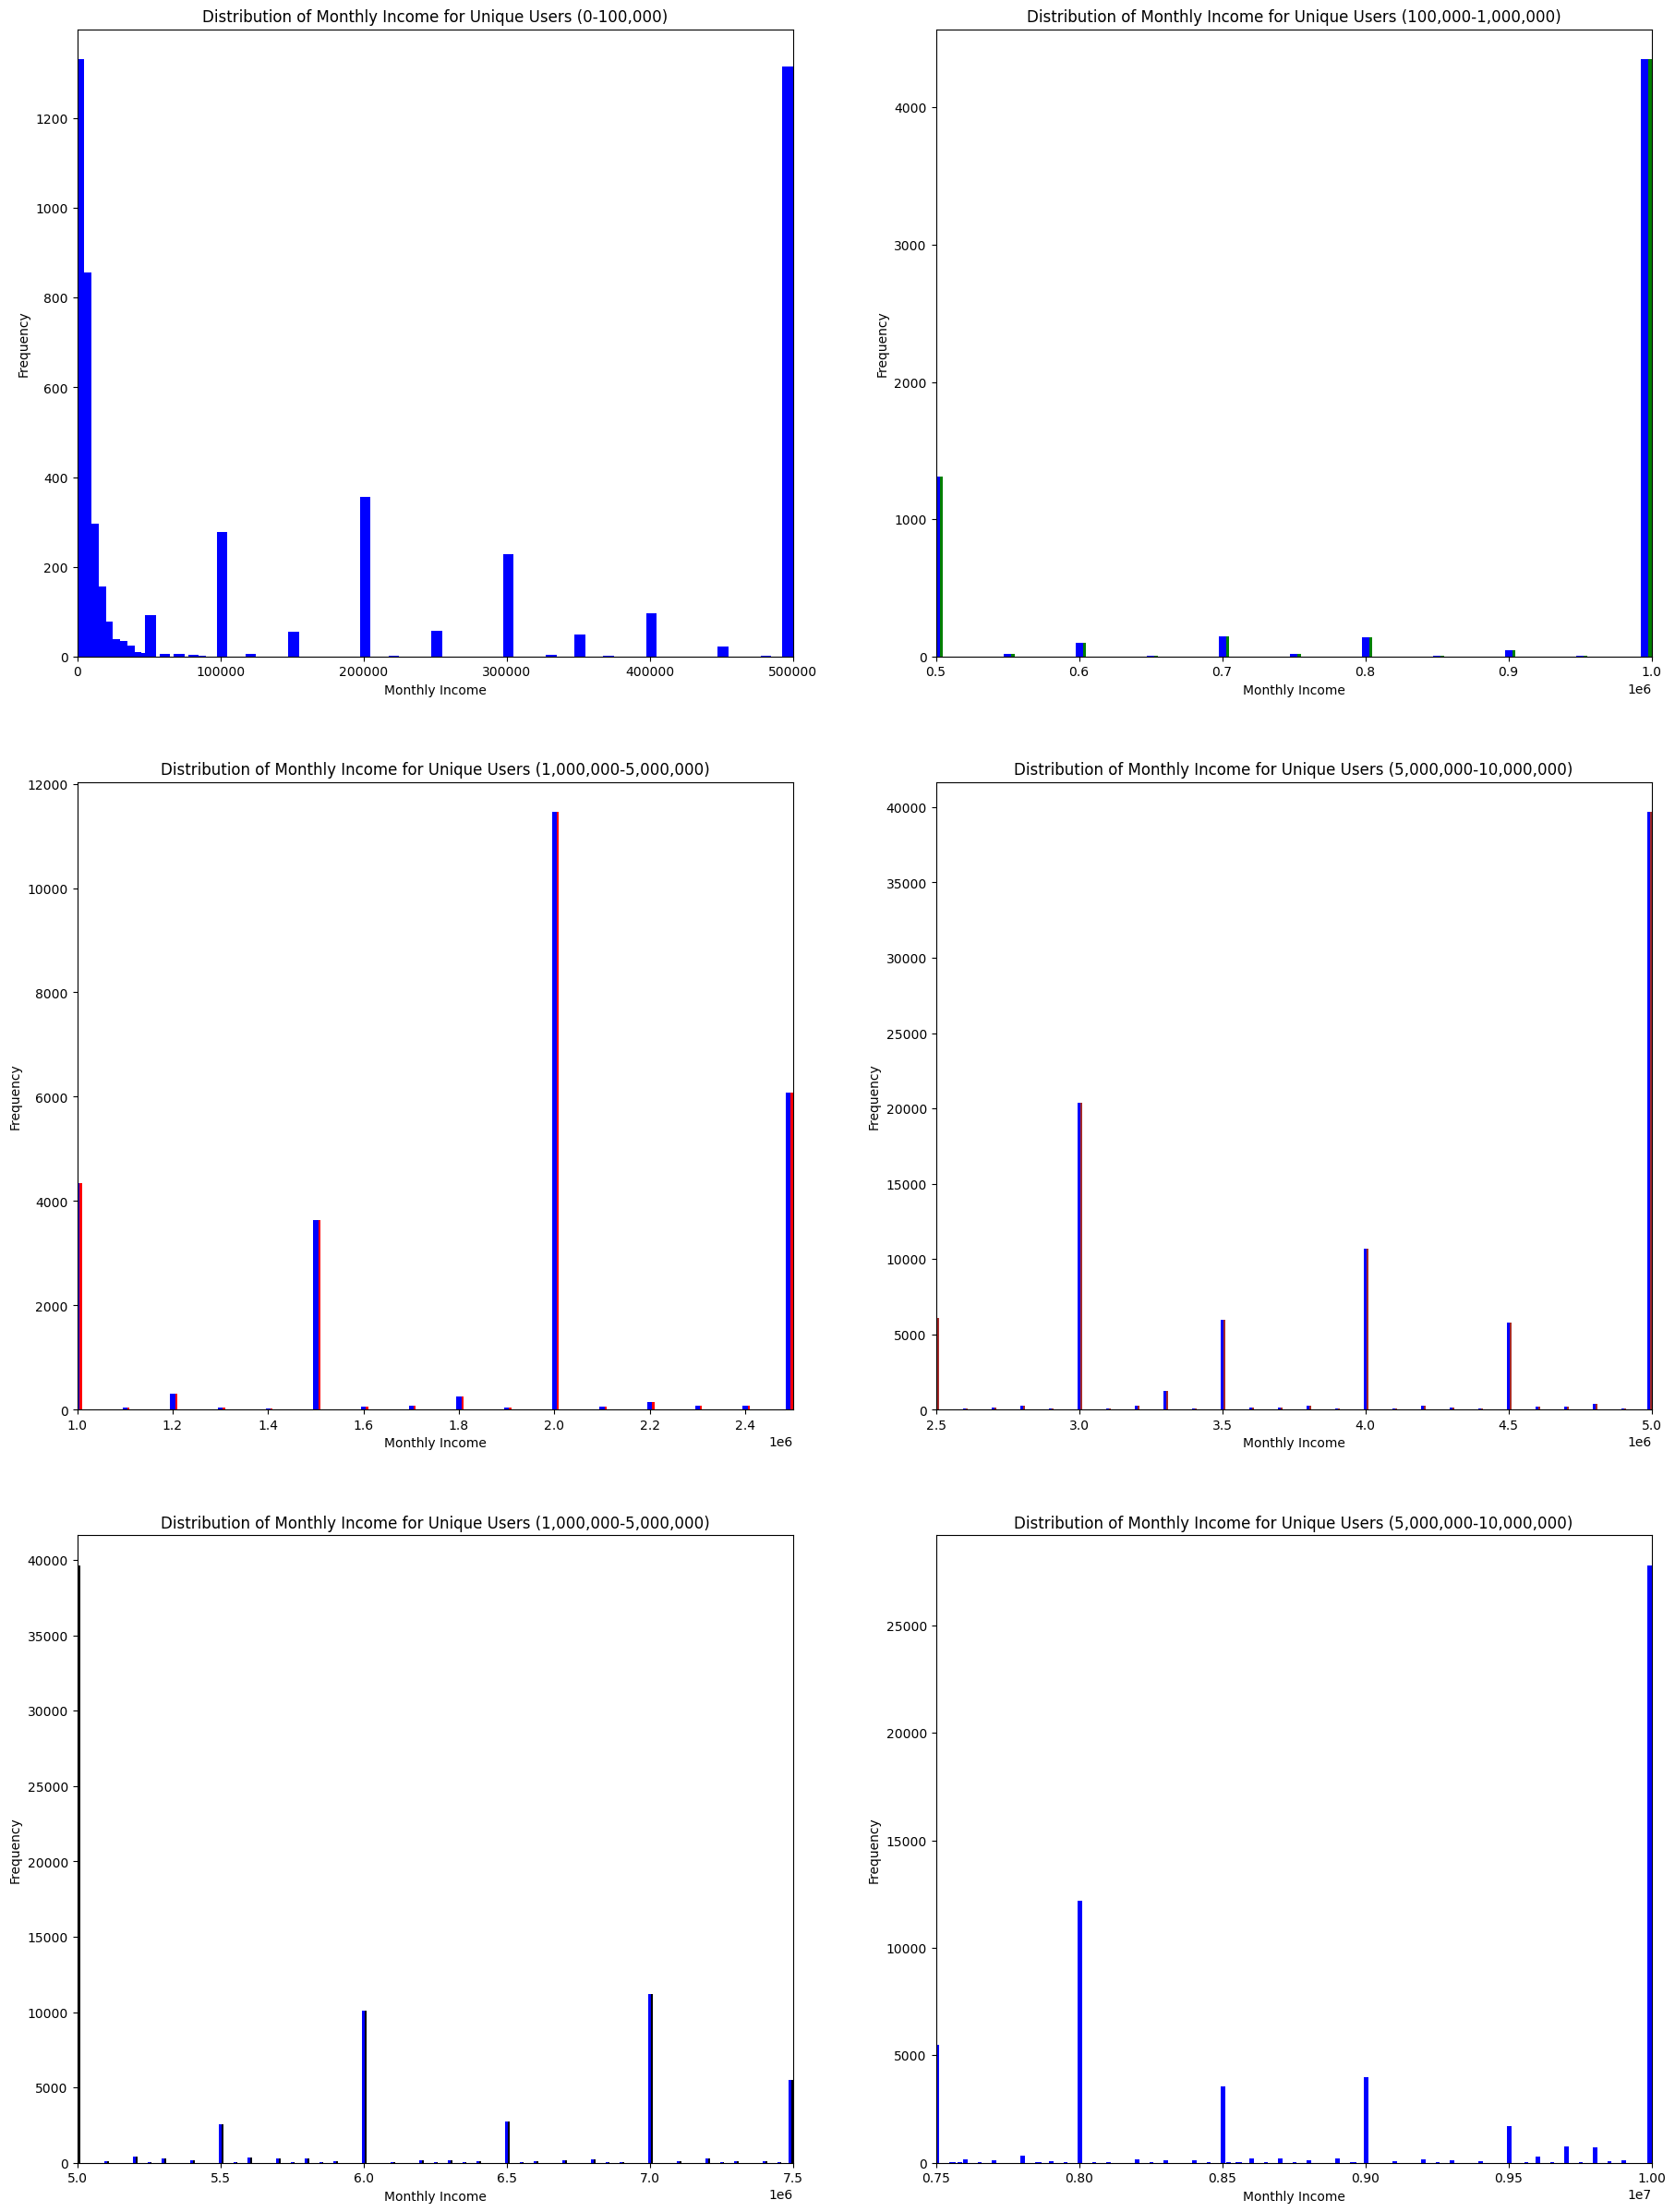

In [12]:
unique_users_df = users_df.drop_duplicates(subset='user_id')
plt.figure(figsize=(22, 30))

# Plot 1
plt.subplot(3, 2, 1)
counts, bins, _ = plt.hist(unique_users_df['monthly_income'], bins=range(0, 500001, 5000), color='blue')
plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), color='blue')
plt.title('Distribution of Monthly Income for Unique Users (0-100,000)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xlim(0, 500000)

# Plot 2
plt.subplot(3, 2, 2)
counts, bins, _ = plt.hist(unique_users_df['monthly_income'], bins=range(500000, 1000001, 5000), color='green')
plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), color='blue')
plt.title('Distribution of Monthly Income for Unique Users (100,000-1,000,000)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xlim(500000, 1000000)

# Plot 3
plt.subplot(3, 2, 3)
counts, bins, _ = plt.hist(unique_users_df['monthly_income'], bins=range(1000000, 2500001, 10000), color='red')
plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), color='blue')
plt.title('Distribution of Monthly Income for Unique Users (1,000,000-5,000,000)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xlim(1000000, 2500000)

# Plot 4
plt.subplot(3, 2, 4)
counts, bins, _ = plt.hist(unique_users_df['monthly_income'], bins=range(2500000, 5000001, 10000), color='brown')
plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), color='blue')
plt.title('Distribution of Monthly Income for Unique Users (5,000,000-10,000,000)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xlim(2500000, 5000000)

# Plot 5
plt.subplot(3, 2, 5)
counts, bins, _ = plt.hist(unique_users_df['monthly_income'], bins=range(5000000, 7500001, 10000), color='black')
plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), color='blue')
plt.title('Distribution of Monthly Income for Unique Users (1,000,000-5,000,000)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xlim(5000000, 7500000)

# Plot 6
plt.subplot(3, 2, 6)
counts, bins, _ = plt.hist(unique_users_df['monthly_income'], bins=range(7500000, 10000001, 10000), color='blue')
plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), color='blue')
plt.title('Distribution of Monthly Income for Unique Users (5,000,000-10,000,000)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xlim(7500000, 10000000)

plt.show()

In [13]:
data_types = users_df.dtypes
data_types

user_id                    int64
gender                    object
avg_airtime              float64
date_of_birth             object
education_status         float64
employment_status        float64
bank                      object
monthly_income           float64
number_children          float64
owns_car                    bool
state                     object
payment_system             int64
origin                     int64
professional_category    float64
email_is_validated          bool
dtype: object

##### The data types for each columns seems to be in a good order based on what each column mean. 

In [14]:
users_df['date_of_birth'] = pd.to_datetime(users_df['date_of_birth'], errors='coerce')
users_df

<ipython-input-14-8891661626c6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  users_df['date_of_birth'] = pd.to_datetime(users_df['date_of_birth'], errors='coerce')


,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,state,payment_system,origin,professional_category,email_is_validated
0,2559701,male,500000.0,1995-04-19,2.0,6.0,uba,7000000.0,0.0,False,Ekiti,3,2,2.0,False
1,2682567,male,500000.0,1997-10-01,1.0,1.0,access,20000000.0,0.0,False,Lagos,3,1,2.0,False
2,2303641,male,200000.0,1986-07-27,1.0,1.0,unionBank,5000000.0,NaN,False,Abuja,3,2,4.0,False
3,2445202,male,100000.0,1988-02-28,1.0,0.0,sterling,5000000.0,2.0,False,Ogun,3,2,7.0,False
4,2472685,female,500000.0,1987-10-02,2.0,0.0,gtb,13700000.0,NaN,False,Ogun,3,2,7.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298629,2946325,male,4000000.0,1999-04-14,2.0,6.0,skyeBank,300000.0,2.0,False,Ondo,3,1,7.0,True
298630,2964872,male,1000000.0,2000-03-21,2.0,0.0,gtb,5000000.0,0.0,False,Osun,3,1,2.0,True
298631,2964947,male,500000.0,1998-06-09,1.0,1.0,firstBank,2500000.0,1.0,False,Osun,3,1,6.0,True
298632,2640844,female,3600000.0,1989-04-16,2.0,1.0,gtb,50000000.0,1.0,False,Lagos,3,1,4.0,True


##### We need to confirm our dataset has no negative income

In [15]:
negative_income = users_df[users_df['monthly_income'] < 0]
negative_income

,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,state,payment_system,origin,professional_category,email_is_validated
156393,2513661,male,800000.0,1957-06-30,1.0,1.0,unionBank,-5000000.0,5.0,False,Imo,3,2,0.0,False
198618,2541843,female,200000.0,1980-11-25,2.0,3.0,gtb,-4000000.0,0.0,False,Abuja,3,2,NaN,False


##### Having a monthly negative income means there was an error in the data collection. Rows like this will:
##### a. Either be amended by re reviewing the customers file or contacting the customer 
##### b. Or needs to be dropped as they will affect our data analysis. 

#### To assess the completeness of the data 

In [16]:
# Taking the most important fields to be "required_fields or rfs"
rfs = ['user_id', 'gender', 'monthly_income', 'state', 'payment_system']
missing_rfs = users_df[users_df[rfs].isnull().any(axis=1)]
missing_rfs

,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,state,payment_system,origin,professional_category,email_is_validated
904,2560808,NaN,NaN,1994-11-28,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
4474,2560877,NaN,NaN,1980-12-12,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
26864,2563412,NaN,NaN,1986-02-04,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
42664,2874313,NaN,NaN,1999-05-07,NaN,NaN,uba,NaN,NaN,False,NaN,3,2,NaN,True
48089,2561066,NaN,NaN,1994-02-01,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
102914,2553979,NaN,NaN,1984-04-22,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
189474,2355360,NaN,NaN,1985-12-09,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
258149,2355442,male,NaN,1984-08-18,2.0,1.0,providus,NaN,NaN,False,Lagos,3,6,0.0,False
265831,2475716,NaN,NaN,1984-07-24,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False
286091,2476458,NaN,NaN,1990-05-27,NaN,NaN,NaN,NaN,NaN,False,NaN,3,6,NaN,False


##### Recommendation - We can either drop these rows, use the mean of these rows or contact the customer for clarification.

### TASK 1 SUMMARY

In [17]:
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:\n", duplicate_rows)
print("\nNumerical Summary:\n", num_summary)
print("\nData Types:\n", data_types)
print("\nUsers with Negative Monthly Income:\n", negative_income)
print("\nUsers with Missing Required Fields:\n", missing_rfs)

Missing Values:
 user_id                      0
gender                       9
avg_airtime              12250
date_of_birth               28
education_status         13775
employment_status            9
bank                     11456
monthly_income              10
number_children          27276
owns_car                     0
state                        9
payment_system               0
origin                       0
professional_category    41830
email_is_validated           0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [user_id, gender, avg_airtime, date_of_birth, education_status, employment_status, bank, monthly_income, number_children, owns_car, state, payment_system, origin, professional_category, email_is_validated]
Index: []

Numerical Summary:
             user_id   avg_airtime  education_status  employment_status  \
count  2.986340e+05  2.863840e+05     284859.000000      298625.000000   
mean   2.629420e+06  1.104947e+10          1.708765           1.962478   
std

### TASK 2 - PLOTLY VISUALIZATION

In [18]:
%load_ext autoreload
%autoreload 2

## TASK 3

### LOAN ANALYSIS

#### Load the second data and merge with the first data.

In [19]:
async def download(url2, filename2):
    response = await pyfetch(url2)
    if response.status == 200:
        with open(filename2, "wb") as f2:
            f2.write(await response.bytes())

In [20]:
file_name2="IBM-DS0321EN-SkillsNetwork/labs/module_2/applications.csv"

In [21]:
await download(file_name2, "applications.csv")
file_name2="applications.csv"

In [22]:
loans_df = pd.read_csv(file_name2)
loans_df.head()

,user_id,loan_status,principal,balance,defauted,repaid,loan_reason,application_datetime,approval_datetime,repayment_datetime,last_payment_date,rejection_datetime,is_fraudulent,next_payment_date,interest,late_fee,product_id
0,2302281,REJECTED,2000,2000,0,0,Business,2022-01-01,NaN,NaN,2022-01-31,2022-01-01,False,2022-01-31,0,0,2
1,2302282,REJECTED,1000,1000,0,0,Business,2022-01-21,NaN,NaN,2022-02-20,2022-01-21,False,2022-02-20,0,0,1
2,2302282,REJECTED,1000,1000,0,0,Business,2022-01-14,NaN,NaN,2022-01-29,2022-01-14,False,2022-01-29,0,0,1
3,2302282,REJECTED,1000,1000,0,0,Business,2022-01-05,NaN,NaN,2022-01-20,2022-01-05,False,2022-01-20,0,0,1
4,2302282,REJECTED,1000,1000,0,0,Business,2022-01-01,NaN,NaN,2022-01-31,2022-01-01,False,2022-01-31,0,0,1


In [23]:
#Merging the both datasets together 
both_df = pd.merge(users_df, loans_df, on='user_id', how='inner')
both_df

,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,...,application_datetime,approval_datetime,repayment_datetime,last_payment_date,rejection_datetime,is_fraudulent,next_payment_date,interest,late_fee,product_id
0,2682567,male,500000.0,1997-10-01,1.0,1.0,access,20000000.0,0.0,False,...,2022-07-21,NaN,NaN,2022-08-20,2022-07-21,False,2022-08-20,0,0,1
1,2304719,male,170000.0,1996-10-03,2.0,6.0,access,13300000.0,0.0,False,...,2022-01-28,2022-01-28,2022-02-12,2022-02-12,NaN,False,2022-02-12,150,0,2
2,2856805,female,500000.0,2002-07-07,2.0,1.0,access,3000000.0,1.0,False,...,2022-09-28,NaN,NaN,2022-11-27,2022-09-28,False,2022-10-28,0,0,12
3,2965190,male,8500000.0,1966-10-12,2.0,1.0,access,18000000.0,0.0,False,...,2022-11-08,2022-11-08,NaN,2022-11-23,NaN,False,2022-11-23,0,0,11
4,2309307,male,300000.0,2002-02-03,2.0,0.0,keystone,9700000.0,0.0,False,...,2022-01-05,2022-01-05,2022-02-12,2022-02-04,NaN,False,2022-02-04,600,160,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542432,2416662,male,150000.0,1996-08-27,1.0,0.0,firstBank,5000000.0,0.0,False,...,2022-06-24,NaN,NaN,2022-07-19,2022-06-24,False,2022-07-19,0,0,2
542433,2416662,male,150000.0,1996-08-27,1.0,0.0,firstBank,5000000.0,0.0,False,...,2022-03-03,NaN,NaN,2022-03-18,2022-03-03,False,2022-03-18,0,0,8
542434,2326393,male,1000000.0,1995-04-06,2.0,0.0,fcmb,6250000.0,NaN,False,...,2022-01-13,NaN,NaN,2022-02-12,2022-01-13,False,2022-02-12,0,0,2
542435,2454605,male,200000.0,1999-01-15,1.0,1.0,zenithBank,2000000.0,0.0,False,...,2022-04-06,NaN,NaN,2022-05-06,2022-04-06,False,2022-05-06,0,0,2


#### Create a copy of our merged data. This is performed because to find the loan status on different product, we need our primary data to be the loans_df where this information can be extracted.

In [24]:
# First create a copy of my data to prevent issues with future analysis
bothc_df = both_df.copy()

##### Delete the rows where product_id is null. If this is not taken care of, it will affect our data as it will not give the accurate analysis and since we are working with products, groups, sums and averages, we need a product_id if not it is not relevant to our work.

In [25]:
bothc_df = bothc_df.dropna(subset=['product_id'])
bothc_df.head()

,user_id,gender,avg_airtime,date_of_birth,education_status,employment_status,bank,monthly_income,number_children,owns_car,...,application_datetime,approval_datetime,repayment_datetime,last_payment_date,rejection_datetime,is_fraudulent,next_payment_date,interest,late_fee,product_id
0,2682567,male,500000.0,1997-10-01,1.0,1.0,access,20000000.0,0.0,False,...,2022-07-21,NaN,NaN,2022-08-20,2022-07-21,False,2022-08-20,0,0,1
1,2304719,male,170000.0,1996-10-03,2.0,6.0,access,13300000.0,0.0,False,...,2022-01-28,2022-01-28,2022-02-12,2022-02-12,NaN,False,2022-02-12,150,0,2
2,2856805,female,500000.0,2002-07-07,2.0,1.0,access,3000000.0,1.0,False,...,2022-09-28,NaN,NaN,2022-11-27,2022-09-28,False,2022-10-28,0,0,12
3,2965190,male,8500000.0,1966-10-12,2.0,1.0,access,18000000.0,0.0,False,...,2022-11-08,2022-11-08,NaN,2022-11-23,NaN,False,2022-11-23,0,0,11
4,2309307,male,300000.0,2002-02-03,2.0,0.0,keystone,9700000.0,0.0,False,...,2022-01-05,2022-01-05,2022-02-12,2022-02-04,NaN,False,2022-02-04,600,160,2


In [26]:
# To find the conversion rates for each type of product loans = cr_all
cr_all = loans_df.groupby('product_id')['user_id'].nunique() / users_df['user_id'].nunique()
print(cr_all)

product_id
1     0.395605
2     0.198132
8     0.165313
9     0.000157
11    0.084086
12    0.120016
Name: user_id, dtype: float64


In [27]:
loans_df['loan_status'].unique()

array(['REJECTED', 'DEFAULTED', 'OVERDUE', 'PAID', 'OPEN'], dtype=object)

#### To find the conversion rates for loans with different categories of loan status = cr_all

In [28]:
conversion_rates = {}

for status in ['REJECTED', 'DEFAULTED', 'OVERDUE', 'PAID', 'OPEN']:
    users_with_status = loans_df[loans_df['loan_status'] == status]['user_id'].nunique()
    conversion_rates[status] = users_with_status / users_df['user_id'].nunique()

print(conversion_rates)

{'REJECTED': 0.7487225165252449, 'DEFAULTED': 0.06801636786166344, 'OVERDUE': 0.05253922862098756, 'PAID': 0.11887795763375905, 'OPEN': 0.05055352036271824}


#### To find the total repayment rate using our repaid column as key variable

In [29]:
repayment_rate = bothc_df['repaid'].mean()
repayment_rate

433.3271107981203

#### Have an idea of the type of unique products

In [30]:
product_id_group = bothc_df.groupby('product_id')
product_id_group

In [31]:
for product_id, group_data in product_id_group:
    print(f"Product ID: {product_id}")

Product ID: 1
Product ID: 2
Product ID: 8
Product ID: 9
Product ID: 11
Product ID: 12


##### From this we can see the products 1, 2, 8, 9, 11, and 12

#### Get the repayment rate for each category of product using the repaid variable

In [32]:
repayment_rate_per_group = product_id_group['repaid'].mean()
repayment_rate_per_group

product_id
1     345.995736
2     433.470193
8     638.634597
9     999.403846
11    648.394407
12    150.135044
Name: repaid, dtype: float64

##### Observation: A Higher amount of loan repayment rate indicates that the users of that product are repaying a larger portion of their loans. Users who access product 9 are repaying a high portion of their loans while users in product 12 are not repaying as should be. This will be subjected to further analysis. 

#### Get the total repayment for each product category using the repaid variable.

In [33]:
total_repayment_per_group = product_id_group['repaid'].sum()
total_repayment_per_group

product_id
1     78707456
2     49481056
8     64687937
9        51969
11    35384828
12     6739412
Name: repaid, dtype: int64

In [37]:
repayment_count_per_product = product_id_group['repaid'].value_counts()

rcount_per_product = repayment_count_per_product.reset_index(name='count')
rcount_per_product = rcount_per_product.sort_values(by='count', ascending=False)
rcount_per_product.head()

,product_id,repaid,count
0,1,0,181656
2139,2,0,99481
3954,8,0,78313
5907,11,0,44428
7253,12,0,42233


#### Further general credit analysis of data to give an idea about the exposures, repayments and defaults.

In [38]:
total_principal = bothc_df['principal'].sum()
total_principal

940726034

In [39]:
total_balance = bothc_df['balance'].sum()
total_balance

750657918

In [40]:
total_repaid = bothc_df['repaid'].sum()
total_repaid

235052658

In [41]:
total_defaulted = bothc_df['defauted'].sum()
total_defaulted

34773560

In [42]:
# Assuming the avg_airtime column contains the amount of loan approved for a customer. It may or more not have been drawn upon
total_approved_loan = bothc_df["avg_airtime"].sum()
total_approved_loan = bothc_df[bothc_df['loan_status'] != 'REJECTED']['avg_airtime'].sum() 
total_approved_loan

103581131750000.0

#### Get the running approved loans excluding thise that were rejected as this means the loan was never approved and there will be no exposure for Quick Check. Also paid loans will be excluded because although the loan was approved, it has been paid down on which implies no exposure for the bank. 

In [45]:
for status in ['DEFAULTED', 'OVERDUE', 'OPEN']:
    total_loan_aa = bothc_df[bothc_df['loan_status'] == status]['avg_airtime'].sum()
    print(f"Total amount of approved loans that have been {status}: {total_loan_aa}")

Total amount of approved loans that have been DEFAULTED: 100322450822600.0
Total amount of approved loans that have been OVERDUE: 1008261685800.0
Total amount of approved loans that have been OPEN: 722468440100.0


In [47]:
for status in ['DEFAULTED', 'OVERDUE', 'OPEN']:
    total_loan_running = bothc_df[bothc_df['loan_status'] == status]['principal'].sum()
    print(f"Total principal exposure of credit taken that are {status}: {total_loan_running}")

Total principal exposure of credit taken that are DEFAULTED: 36595500
Total principal exposure of credit taken that are OVERDUE: 33608194
Total principal exposure of credit taken that are OPEN: 42773622


In [48]:
for status in ['DEFAULTED', 'OVERDUE', 'OPEN']:
    total_loan_running = bothc_df[bothc_df['loan_status'] == status]['balance'].sum()
    print(f"Total amount of balance exposure of credit that are {status}: {total_loan_running}")

Total amount of balance exposure of credit that are DEFAULTED: 33954811
Total amount of balance exposure of credit that are OVERDUE: 32565198
Total amount of balance exposure of credit that are OPEN: 41473177


In [54]:
balance_exposure_results = []
principal_exposure_results = [] 
for status in ['DEFAULTED', 'OVERDUE', 'OPEN', 'PAID', 'REJECTED']:
    # Calculate percentage for balance exposures
    total_loan_running_balance = bothc_df[bothc_df['loan_status'] == status]['balance'].sum()
    percentage_balance = (total_loan_running_balance / total_balance) * 100
    balance_exposure_results.append({'Status': status, 'Percentage of Loans': percentage_balance})
    # Calculate percentage for principal exposures
    total_loan_running_principal = bothc_df[bothc_df['loan_status'] == status]['principal'].sum()
    percentage_principal = (total_loan_running_principal / total_principal) * 100
    principal_exposure_results.append({'Status': status, 'Percentage of Loans': percentage_principal})

balance_exposure_df = pd.DataFrame(balance_exposure_results)
principal_exposure_df = pd.DataFrame(principal_exposure_results)

# Merge the two dataframes on the 'Status' column
summary_df = pd.merge(balance_exposure_df, principal_exposure_df, on='Status', suffixes=('_balance', '_principal'))

print("Loan status of Balance and Principal percentage summary:")
summary_df

Loan status of Balance and Principal percentage summary:


,Status,Percentage of Loans_balance,Percentage of Loans_principal
0,DEFAULTED,4.523340,3.890134
1,OVERDUE,4.338221,3.572580
2,OPEN,5.524910,4.546873
3,PAID,0.008155,19.665790
4,REJECTED,85.605374,68.324623


##### Observation: Rejected loans are not supposed to have balances because they were never disbursed in the first place. Further analysis will need to be carried out to get accurate values for defaulted, open and overdue loans

#### To get the amount of defaulted and paid loans per category based on the repaid and defauted column

In [55]:
# la here means loan amount
la_defaulted = bothc_df.groupby('product_id')['defauted'].sum()
la_paid = bothc_df.groupby('product_id')['repaid'].sum()
print("Amount of Defaulted Loans: ", la_defaulted)
print("Amount of paid loans: ", la_paid)

Amount of Defaulted Loans:  product_id
1     10696539
2      8872951
8     10094125
9        31780
11     5078165
12           0
Name: defauted, dtype: int64
Amount of paid loans:  product_id
1     78707456
2     49481056
8     64687937
9        51969
11    35384828
12     6739412
Name: repaid, dtype: int64


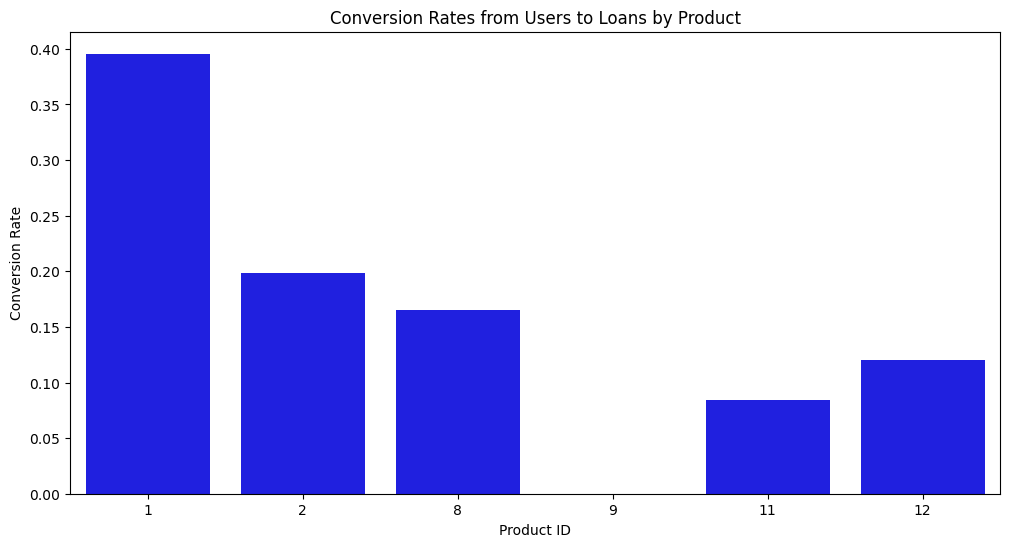

In [56]:
conversion_rates_df = pd.DataFrame(list(cr_all.items()), columns=['Product ID', 'Conversion Rate'])

# Plot Conversion Rates by Product
plt.figure(figsize=(12, 6))
sns.barplot(x='Product ID', y='Conversion Rate', data=conversion_rates_df, color='blue')
plt.title('Conversion Rates from Users to Loans by Product')
plt.xlabel('Product ID')
plt.ylabel('Conversion Rate')
plt.show()


##### Observation: Product id of 1 has the highest conversion rate and product id 9 has the lowest, therefore further analysis will be carried out to uncover some useful insights.

### PRODUCT 1 ANALYSIS

#### Assuming average airtime is the amount of loan approved that the customer can collect but the customer has not drawn on it. 

In [57]:
product_1_df = bothc_df[bothc_df['product_id'] == 1]

# Summary amount of the variables of product 1
total_approved_loans_product_1 = product_1_df['avg_airtime'].sum()
total_approved_loans_product_1 = product_1_df[product_1_df['loan_status'] != 'REJECTED']['avg_airtime'].sum() 
total_drawn_loans_product_1 = product_1_df['principal'].sum()
defaulted_amnt_p1 = product_1_df['defauted'].sum()
repaid_amnt_p1 = product_1_df['repaid'].sum()
balance_amnt_p1 = product_1_df['balance'].sum()

# Exposure amount of defaulted loans of product 1 that have been drawn upon = eadl1
eadl1= product_1_df[product_1_df['loan_status'] == "DEFAULTED"]['principal'].sum()
# Default amount of the drawn amount of defaulted loans of product 1
dade1 = product_1_df[product_1_df['loan_status'] == 'DEFAULTED']['defauted'].sum()
# Repaid amount of the drawn amount of defaulted loans of product 1
rade1 = product_1_df[product_1_df['loan_status'] == 'DEFAULTED']['repaid'].sum()
# Exposure amount of open loans of product 1 that have been drawn upon
eaop1= product_1_df[product_1_df['loan_status'] == "OPEN"]['principal'].sum()
# Default amount of the drawn amount of open loans of product 1
daop1 = product_1_df[product_1_df['loan_status'] == 'OPEN']['defauted'].sum()
# Repaid amount of the drawn amount of open loans of product 1
raop1 = product_1_df[product_1_df['loan_status'] == 'OPEN']['repaid'].sum()
# Exposure amount of overdue loans of product 1 that have been drawn upon
eaov1= product_1_df[product_1_df['loan_status'] == "OVERDUE"]['principal'].sum()
# Default amount of the drawn amount of overdue loans of product 1
daov1 = product_1_df[product_1_df['loan_status'] == 'OVERDUE']['defauted'].sum()
# Repaid amount of the drawn amount of overdue loans of product 1
raov1 = product_1_df[product_1_df['loan_status'] == 'OVERDUE']['repaid'].sum()
# Exposure amount of paid loans of product 1 that have been drawn upon
eapal1= product_1_df[product_1_df['loan_status'] == "PAID"]['principal'].sum()
# Default amount of the drawn amount of paid loans of product 1
dapae1 = product_1_df[product_1_df['loan_status'] == 'PAID']['defauted'].sum()
# Repaid amount of the drawn amount of paid loans of product 1
rapae1 = product_1_df[product_1_df['loan_status'] == 'PAID']['repaid'].sum()


repaid_rate_p1 = rapae1 / total_drawn_loans_product_1
defaulted_rate_p1 = dapae1 / total_drawn_loans_product_1
balance_rate_p1 = balance_amnt_p1 / total_drawn_loans_product_1

print(f"Rates for Product 1:")
print(f"Repaid Rate: {repaid_rate_p1:.2%}")
print(f"Defaulted Rate: {defaulted_rate_p1:.2%}")
print(f"Balance Rate: {balance_rate_p1:.2%}")

Rates for Product 1:
Repaid Rate: 29.65%
Defaulted Rate: 0.03%
Balance Rate: 74.73%


### PRODUCT 9 ANALYSIS

In [58]:
product_9_df = bothc_df[bothc_df['product_id'] == 9]

# Summary amount of the variables of product 1
total_approved_loans_product_9 = product_9_df['avg_airtime'].sum()
total_approved_loans_product_9 = product_9_df[product_9_df['loan_status'] != 'REJECTED']['avg_airtime'].sum() 
total_drawn_loans_product_9 = product_9_df['principal'].sum()
defaulted_amnt_p9 = product_9_df['defauted'].sum()
repaid_amnt_p9 = product_9_df['repaid'].sum()
balance_amnt_p9 = product_9_df['balance'].sum()

# Exposure amount of defaulted loans of product 9 that have been drawn upon = eadl1
eadl9= product_9_df[product_9_df['loan_status'] == "DEFAULTED"]['principal'].sum()
# Default amount of the drawn amount of defaulted loans of product 9
dade9 = product_9_df[product_9_df['loan_status'] == 'DEFAULTED']['defauted'].sum()
# Repaid amount of the drawn amount of defaulted loans of product 9
rade9 = product_9_df[product_9_df['loan_status'] == 'DEFAULTED']['repaid'].sum()
# Exposure amount of open loans of product 9 that have been drawn upon
eaop9 = product_9_df[product_9_df['loan_status'] == "OPEN"]['principal'].sum()
# Default amount of the drawn amount of open loans of product 9
daop9 = product_9_df[product_9_df['loan_status'] == 'OPEN']['defauted'].sum()
# Repaid amount of the drawn amount of open loans of product 9
raop9 = product_9_df[product_9_df['loan_status'] == 'OPEN']['repaid'].sum()
# Exposure amount of overdue loans of product 9 that have been drawn upon
eaov9 = product_9_df[product_9_df['loan_status'] == "OVERDUE"]['principal'].sum()
# Default amount of the drawn amount of overdue loans of product 9
daov9 = product_9_df[product_9_df['loan_status'] == 'OVERDUE']['defauted'].sum()
# Repaid amount of the drawn amount of overdue loans of product 9
raov9 = product_9_df[product_9_df['loan_status'] == 'OVERDUE']['repaid'].sum()
# Exposure amount of paid loans of product 9 that have been drawn upon
eapal9 = product_9_df[product_9_df['loan_status'] == "PAID"]['principal'].sum()
# Default amount of the drawn amount of paid loans of product 9
dapae9 = product_9_df[product_9_df['loan_status'] == 'PAID']['defauted'].sum()
# Repaid amount of the drawn amount of paid loans of product 9
rapae9 = product_9_df[product_9_df['loan_status'] == 'PAID']['repaid'].sum()


repaid_rate_p9 = rapae9 / total_drawn_loans_product_9
defaulted_rate_p9 = dapae9 / total_drawn_loans_product_9
balance_rate_p9 = balance_amnt_p9 / total_drawn_loans_product_9

print(f"Rates for Product 9:")
print(f"Repaid Rate: {repaid_rate_p9:.2%}")
print(f"Defaulted Rate: {defaulted_rate_p9:.2%}")
print(f"Balance Rate: {balance_rate_p9:.2%}")

Rates for Product 9:
Repaid Rate: 3.41%
Defaulted Rate: 0.00%
Balance Rate: 94.76%


##### Observation: Customers that access product id 1 tend to meet repayment more than the customers that access prouct id 9. The fact that more customers access product id 1 may be the reason why there is a less default rate for product 9. Further analysis will be carried out.

### VISUALIZATION STATISTICS FOR PRODUCTS WITH THE HIGHEST (PRODUCT 1) AND LOWEST (PRODUCT 9) CONVERSION RATES

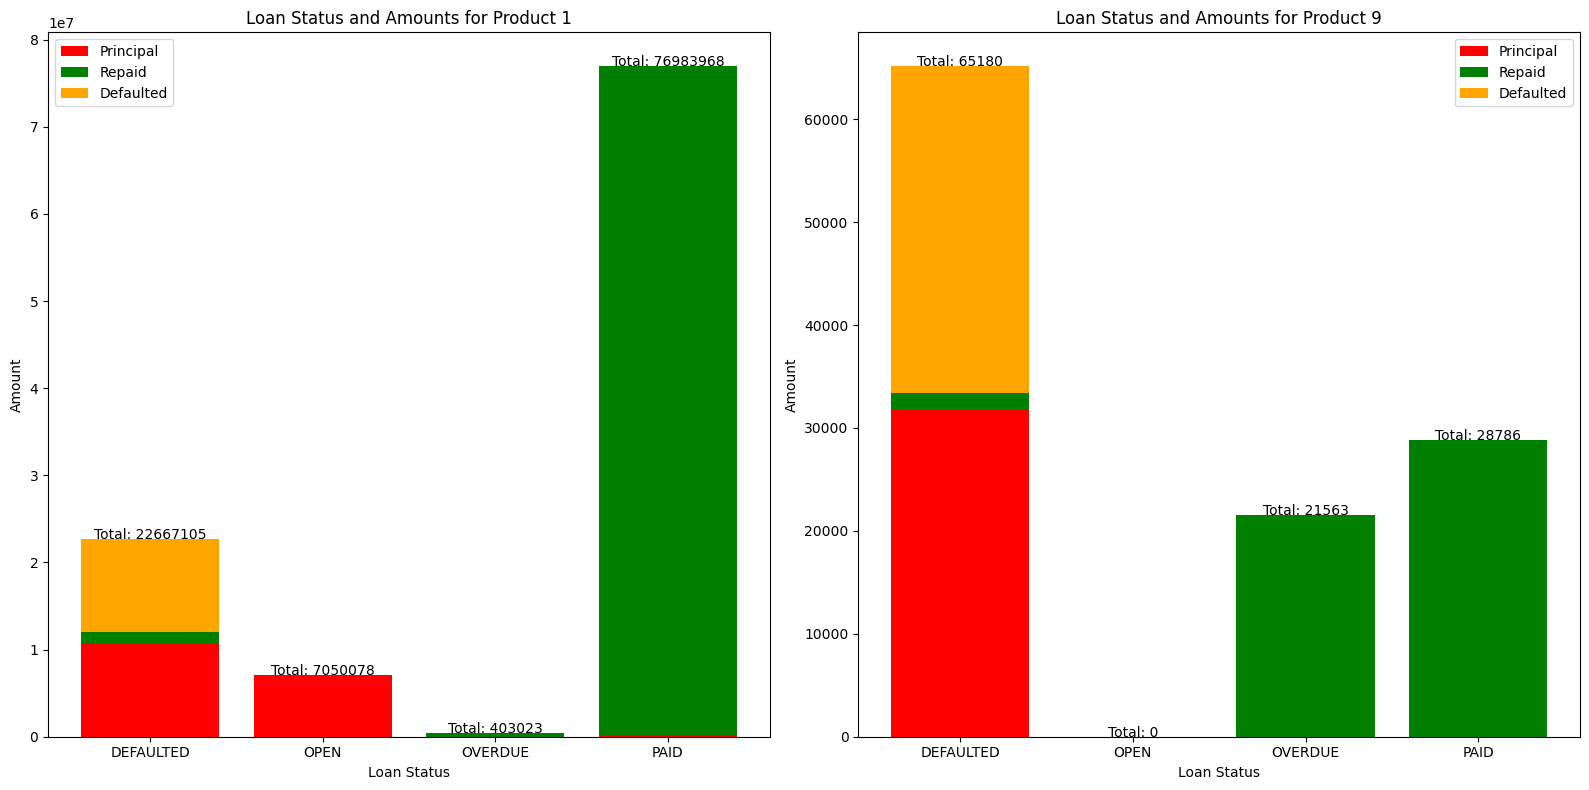

In [59]:
# Graph for Product 1
statuses_1 = ['DEFAULTED', 'OPEN', 'OVERDUE', 'PAID']
principal_amounts_1 = [dade1, eaop1, daov1, dapae1]
repaid_amounts_1 = [rade1, raop1, raov1, rapae1]
defaulted_amounts_1 = [dade1, daop1, daov1, dapae1]  # Assuming defaulted amount is in all loan status

plt.figure(figsize=(16, 8))

# Subplot 1
plt.subplot(1, 2, 1)
bar_width = 0.4

plt.bar(statuses_1, principal_amounts_1, color='red', label='Principal')
plt.bar(statuses_1, repaid_amounts_1, color='green', bottom=principal_amounts_1, label='Repaid')
plt.bar(statuses_1, defaulted_amounts_1, color='orange', bottom=[i + j for i, j in zip(principal_amounts_1, repaid_amounts_1)], label='Defaulted')

plt.title('Loan Status and Amounts for Product 1')
plt.xlabel('Loan Status')
plt.ylabel('Amount')
plt.legend()

for i, (principal, repaid, defaulted) in enumerate(zip(principal_amounts_1, repaid_amounts_1, defaulted_amounts_1)):
    plt.text(i, principal + repaid + defaulted + 0.1, f'Total: {principal + repaid + defaulted}', ha='center')

# Graph for Product 9
statuses_9 = ['DEFAULTED', 'OPEN', 'OVERDUE', 'PAID']
principal_amounts_9 = [dade9, eaop9, daov9, dapae9]
repaid_amounts_9 = [rade9, raop9, raov9, rapae9]
defaulted_amounts_9 = [dade9, daop9, daov9, dapae9]  # Assuming defaulted amount is in all loan status

# Subplot 2
plt.subplot(1, 2, 2)
bar_width = 0.4

plt.bar(statuses_9, principal_amounts_9, color='red', label='Principal')
plt.bar(statuses_9, repaid_amounts_9, color='green', bottom=principal_amounts_9, label='Repaid')
plt.bar(statuses_9, defaulted_amounts_9, color='orange', bottom=[i + j for i, j in zip(principal_amounts_9, repaid_amounts_9)], label='Defaulted')

plt.title('Loan Status and Amounts for Product 9')
plt.xlabel('Loan Status')
plt.ylabel('Amount')
plt.legend()

for i, (principal, repaid, defaulted) in enumerate(zip(principal_amounts_9, repaid_amounts_9, defaulted_amounts_9)):
    plt.text(i, principal + repaid + defaulted + 0.1, f'Total: {principal + repaid + defaulted}', ha='center')
    

plt.tight_layout()

plt.show()


##### Observations: 
##### Acquisition - It is observed that customers subscribe to product id 1 than to product id 9. 
##### Repayment rate: Many customers that subscribe to product id 1 are likely to meet repaymemt than those subscribed to product id 9.
##### Default rate: There is more default rate per category credit for product 9 than product 1. But more default amount  for product 9 than product 1, probably due to the fact the acquisition of product 1 is much higher than that of product 9. 

#### VISUALIZATION ANALYSIS ACROSS DIFFERENT CATEGORIES FOR UNIQUE USERS ID 

#### Becasue we want to perform an anlysis based on users, we need to extract the unique users ids because it is possible that one user can access more than one product id.

In [62]:
# Create a DataFrame with unique user IDs and product IDs
unique_users_df = bothc_df.drop_duplicates(subset=['user_id', 'product_id'])

#### PROFESSIONAL CATEGORIES

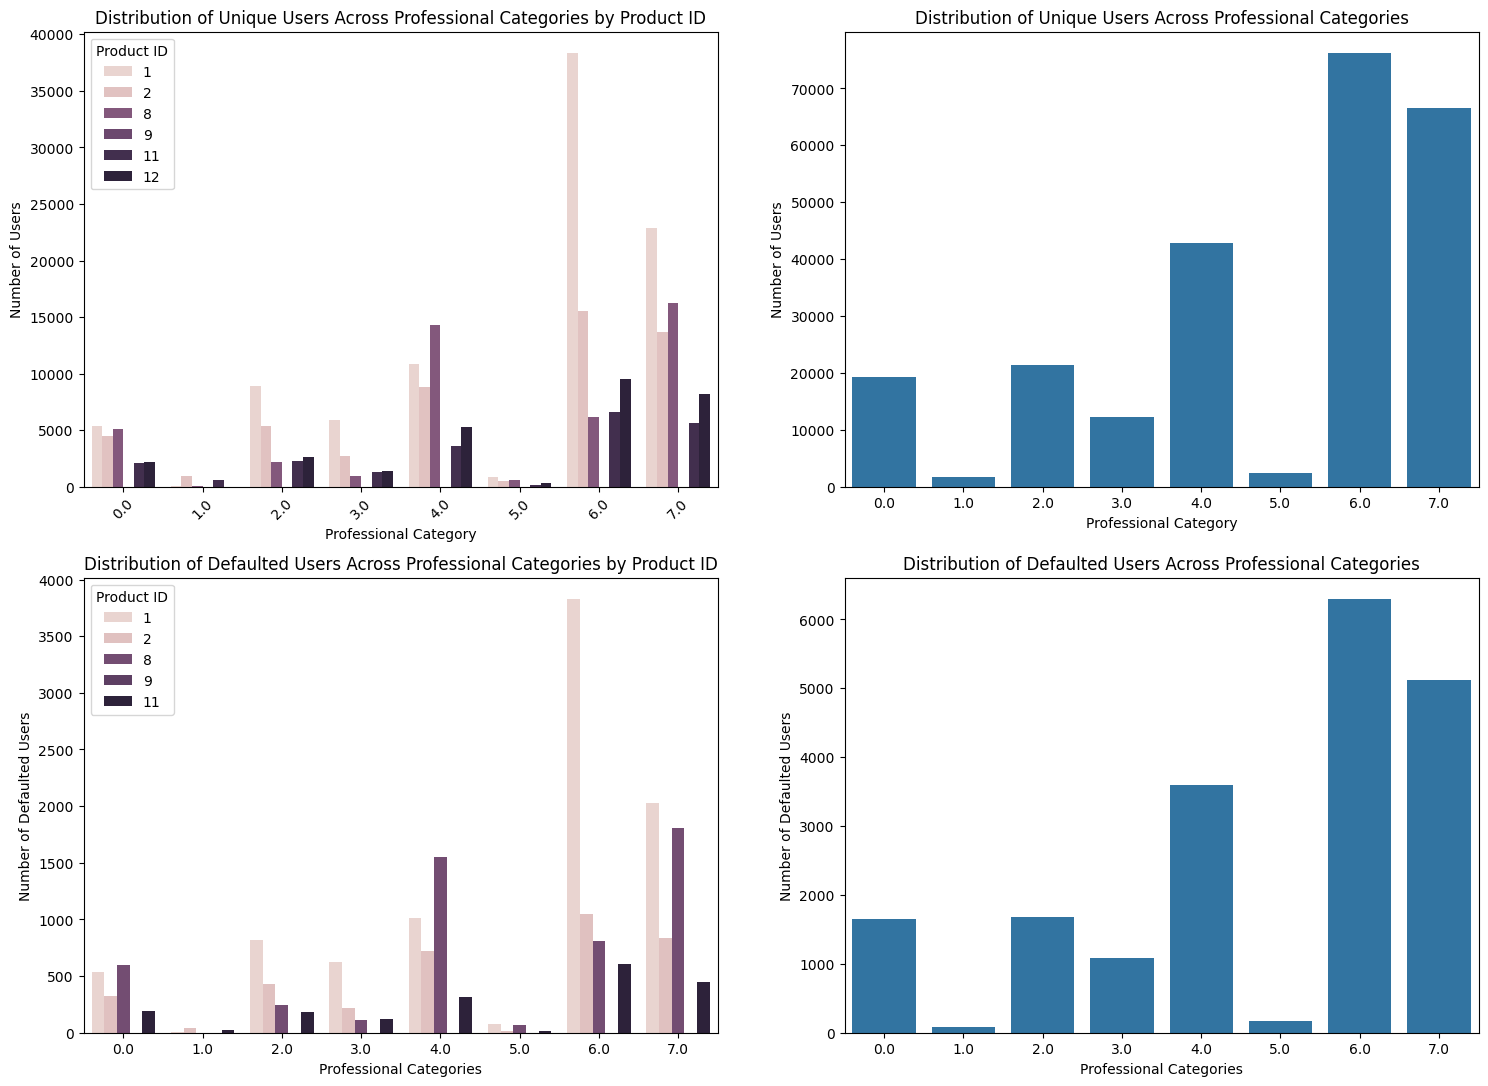

In [ ]:
plt.figure(figsize=(18, 13))

# Plot 1: Distribution of Unique Users Across Professional Categories by Product ID
plt.subplot(2, 2, 1)
sns.countplot(x='professional_category', hue='product_id', data=unique_users_df)
plt.title('Distribution of Unique Users Across Professional Categories by Product ID')
plt.xlabel('Professional Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Product ID', loc='upper left')

# Plot 2: Distribution of Unique Users Across Professional Categories
plt.subplot(2, 2, 2)
sns.countplot(x='professional_category', data=unique_users_df)
plt.title('Distribution of Unique Users Across Professional Categories')
plt.xlabel('Professional Category')
plt.ylabel('Number of Users')

# Plot 3: Distribution of Defaulted Users Across Professional Categories by Product ID
plt.subplot(2, 2, 3)
sns.countplot(x='professional_category', hue='product_id', data=unique_users_df[unique_users_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users Across Professional Categories by Product ID')
plt.xlabel("Professional Categories")
plt.ylabel('Number of Defaulted Users')
plt.legend(title='Product ID', loc='upper left')

# Plot 4: Distribution of Defaulted Users Across Professional Categories
plt.subplot(2, 2, 4)
sns.countplot(x='professional_category', data=unique_users_df[unique_users_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users Across Professional Categories')
plt.xlabel('Professional Categories')
plt.ylabel('Number of Defaulted Users')

plt.show()

#### Observation
##### By category: The top credit users fall in professional category 6, with almost 80000 users, then category 7 with at approximately 70000 users and category 1 having the least accessed credit amount with less than 5000 users. 
##### By product id: The highest product accessed is product 1 with category 6 users accessing more loans than the rest of the professional categories.
##### By defaulted loan status: Almost 4000 defaulted loans were identified to fall under category 6 users who accessed product id 1. with little to no default on product id 12  

#### EDUCATION CATEGORIES

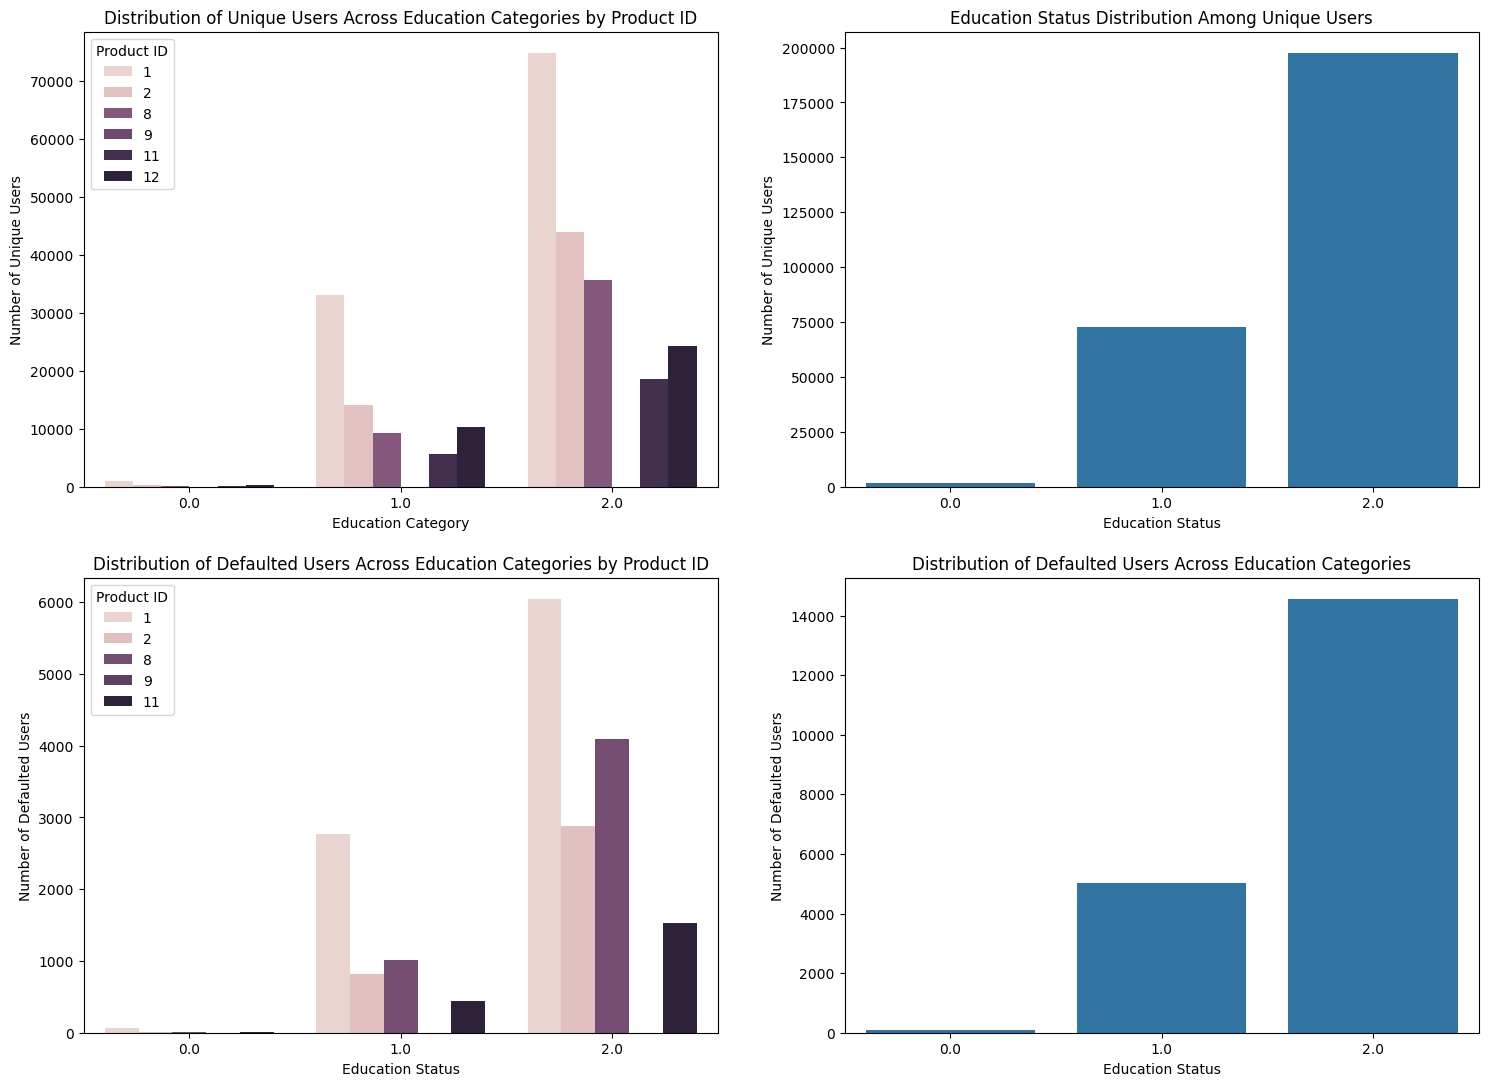

In [64]:
plt.figure(figsize=(18, 13))

# Plot 1: Distribution of Users Across Education Categories by Product ID
plt.subplot(2, 2, 1)
sns.countplot(x='education_status', hue='product_id', data = unique_users_df)
plt.title('Distribution of Unique Users Across Education Categories by Product ID')
plt.xlabel('Education Category')
plt.ylabel('Number of Unique Users')
plt.legend(title='Product ID', loc='upper left')

# Plot 2: Distribution of Users Across Education Categories
plt.subplot(2, 2, 2)
sns.countplot(x='education_status', data = unique_users_df)
plt.title('Education Status Distribution Among Unique Users')
plt.xlabel('Education Status')
plt.ylabel('Number of Unique Users')

# Plot 3: Distribution of Defaulted Users Across Education Categories by Product ID
plt.subplot(2, 2, 3)
sns.countplot(x='education_status', hue='product_id', data=unique_users_df[unique_users_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users Across Education Categories by Product ID')
plt.xlabel("Education Status")
plt.ylabel('Number of Defaulted Users')
plt.legend(title='Product ID', loc='upper left')

# Plot 4: Distribution of Defaulted Users Across Education Categories
plt.subplot(2, 2, 4)
sns.countplot(x='education_status', data=unique_users_df[unique_users_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users Across Education Categories')
plt.xlabel('Education Status')
plt.ylabel('Number of Defaulted Users')

plt.show()

#### Observation
##### By category: The top credit users for this category fall in education category 2, with almost 200,000 users who have accessed ome or more loans, category 0 having the least credit amount accessed. 
##### By product id: The highest product accessed is product 1 with category 2 users accessing more loans than the rest of the educational categories.
##### By defaulted loan status: Approximately 6000 defaulted loans were identified to fall under education category 2 users being the highest in this category and category 0 having the minimum amount of defaukters. There was little to no default on product id 12.

#### PAYMENT SYSTEM

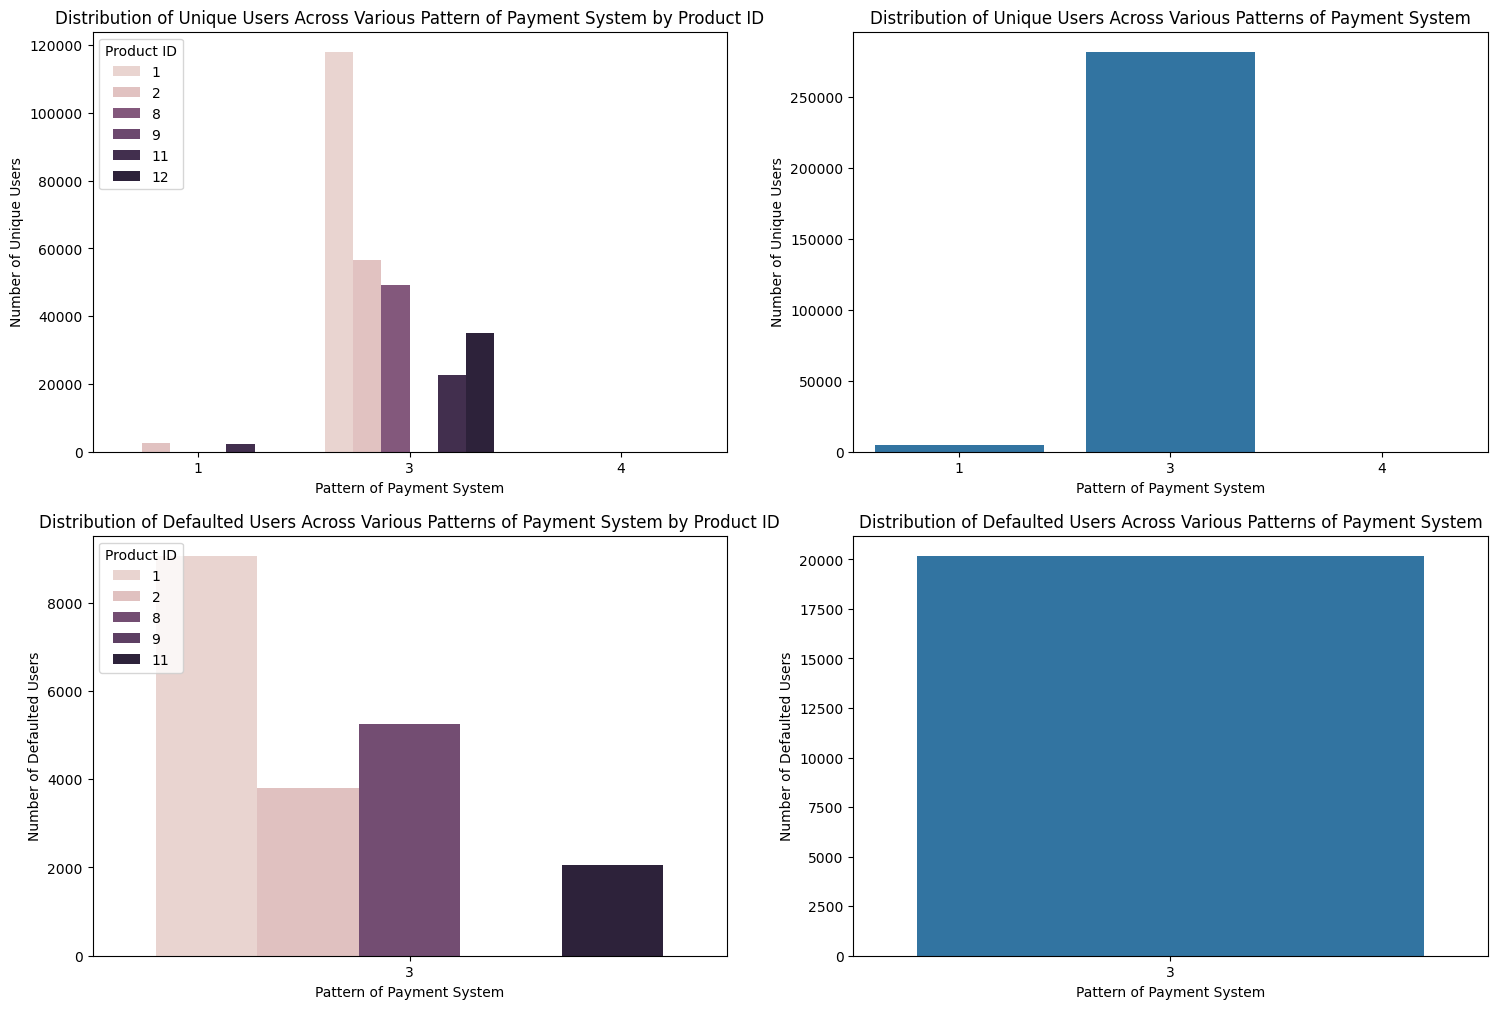

In [65]:
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of Users Across Payment System Categories by Product ID
plt.subplot(2, 2, 1)
sns.countplot(x='payment_system', hue='product_id', data = unique_users_df)
plt.title('Distribution of Unique Users Across Various Pattern of Payment System by Product ID')
plt.xlabel("Pattern of Payment System")
plt.ylabel('Number of Unique Users')
plt.legend(title='Product ID', loc='upper left')

# Plot 2: Distribution of Users Across Payment System
plt.subplot(2, 2, 2)
sns.countplot(x='payment_system', data = unique_users_df)
plt.title('Distribution of Unique Users Across Various Patterns of Payment System')
plt.xlabel('Pattern of Payment System')
plt.ylabel('Number of Unique Users')

# Plot 3: Distribution of Defaulted Users Across Payment System Categories by Product ID
plt.subplot(2, 2, 3)
sns.countplot(x='payment_system', hue='product_id', data=unique_users_df[unique_users_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users Across Various Patterns of Payment System by Product ID')
plt.xlabel("Pattern of Payment System")
plt.ylabel('Number of Defaulted Users')
plt.legend(title='Product ID', loc='upper left')

# Plot 4: Distribution of Defaulted Users Across Payment System
plt.subplot(2, 2, 4)
sns.countplot(x='payment_system', data=unique_users_df[unique_users_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users Across Various Patterns of Payment System')
plt.xlabel('Pattern of Payment System')
plt.ylabel('Number of Defaulted Users')

plt.show()

#### Observation
##### By category: The top credit users for this category can be observed in customers that adopt the payment system category 3, with approximately 290,000 users who have accessed one or more loans and customers that adopted the payment system category 4 having the least credit accessed. 
##### By product id: The highest product accessed is product 1 with category 3 users accessing more loans than the rest of the customers that adopted other payment system categories.
##### By defaulted loan status: Approximately 6000 defaulted loans were identified to fall under category 3 users. with little to no default on product id 12. No customer in category 1 and 4 defaulted.

#### LOAN REASON

#### Because they are different loans for diferent reasons, we will not uniquely classify the customers as a customer can access one or more product id for the same or different reasons. 

In [66]:
bothc_df["loan_reason"].unique()

array(['Business', 'Emergency', 'Rent', 'Medical fees',
       'Personal/Confidential', 'Salary advance', 'Holiday', 'Education',
       'Transportation/Travel', 'Household Goods', 'Car/Auto',
       'Entertainment', 'Wedding Expenses', 'Mortgage/House',
       'Need Phone', 'Other', 'Nairabet & Bet9ja.',
       'In order to complete my school project. Thanks.'], dtype=object)

##### Rename some columns so they can fit into the graph.

In [67]:
bothc_df.loc[bothc_df['loan_reason'] == 'In order to complete my school project. Thanks.', 'loan_reason'] = 'School Project'
bothc_df["loan_reason"].unique()

array(['Business', 'Emergency', 'Rent', 'Medical fees',
       'Personal/Confidential', 'Salary advance', 'Holiday', 'Education',
       'Transportation/Travel', 'Household Goods', 'Car/Auto',
       'Entertainment', 'Wedding Expenses', 'Mortgage/House',
       'Need Phone', 'Other', 'Nairabet & Bet9ja.', 'School Project'],
      dtype=object)

In [68]:
bothc_df['loan_reason'] = bothc_df['loan_reason'].replace('Personal/Confidential', 'P/C')
bothc_df["loan_reason"].unique()

array(['Business', 'Emergency', 'Rent', 'Medical fees', 'P/C',
       'Salary advance', 'Holiday', 'Education', 'Transportation/Travel',
       'Household Goods', 'Car/Auto', 'Entertainment', 'Wedding Expenses',
       'Mortgage/House', 'Need Phone', 'Other', 'Nairabet & Bet9ja.',
       'School Project'], dtype=object)

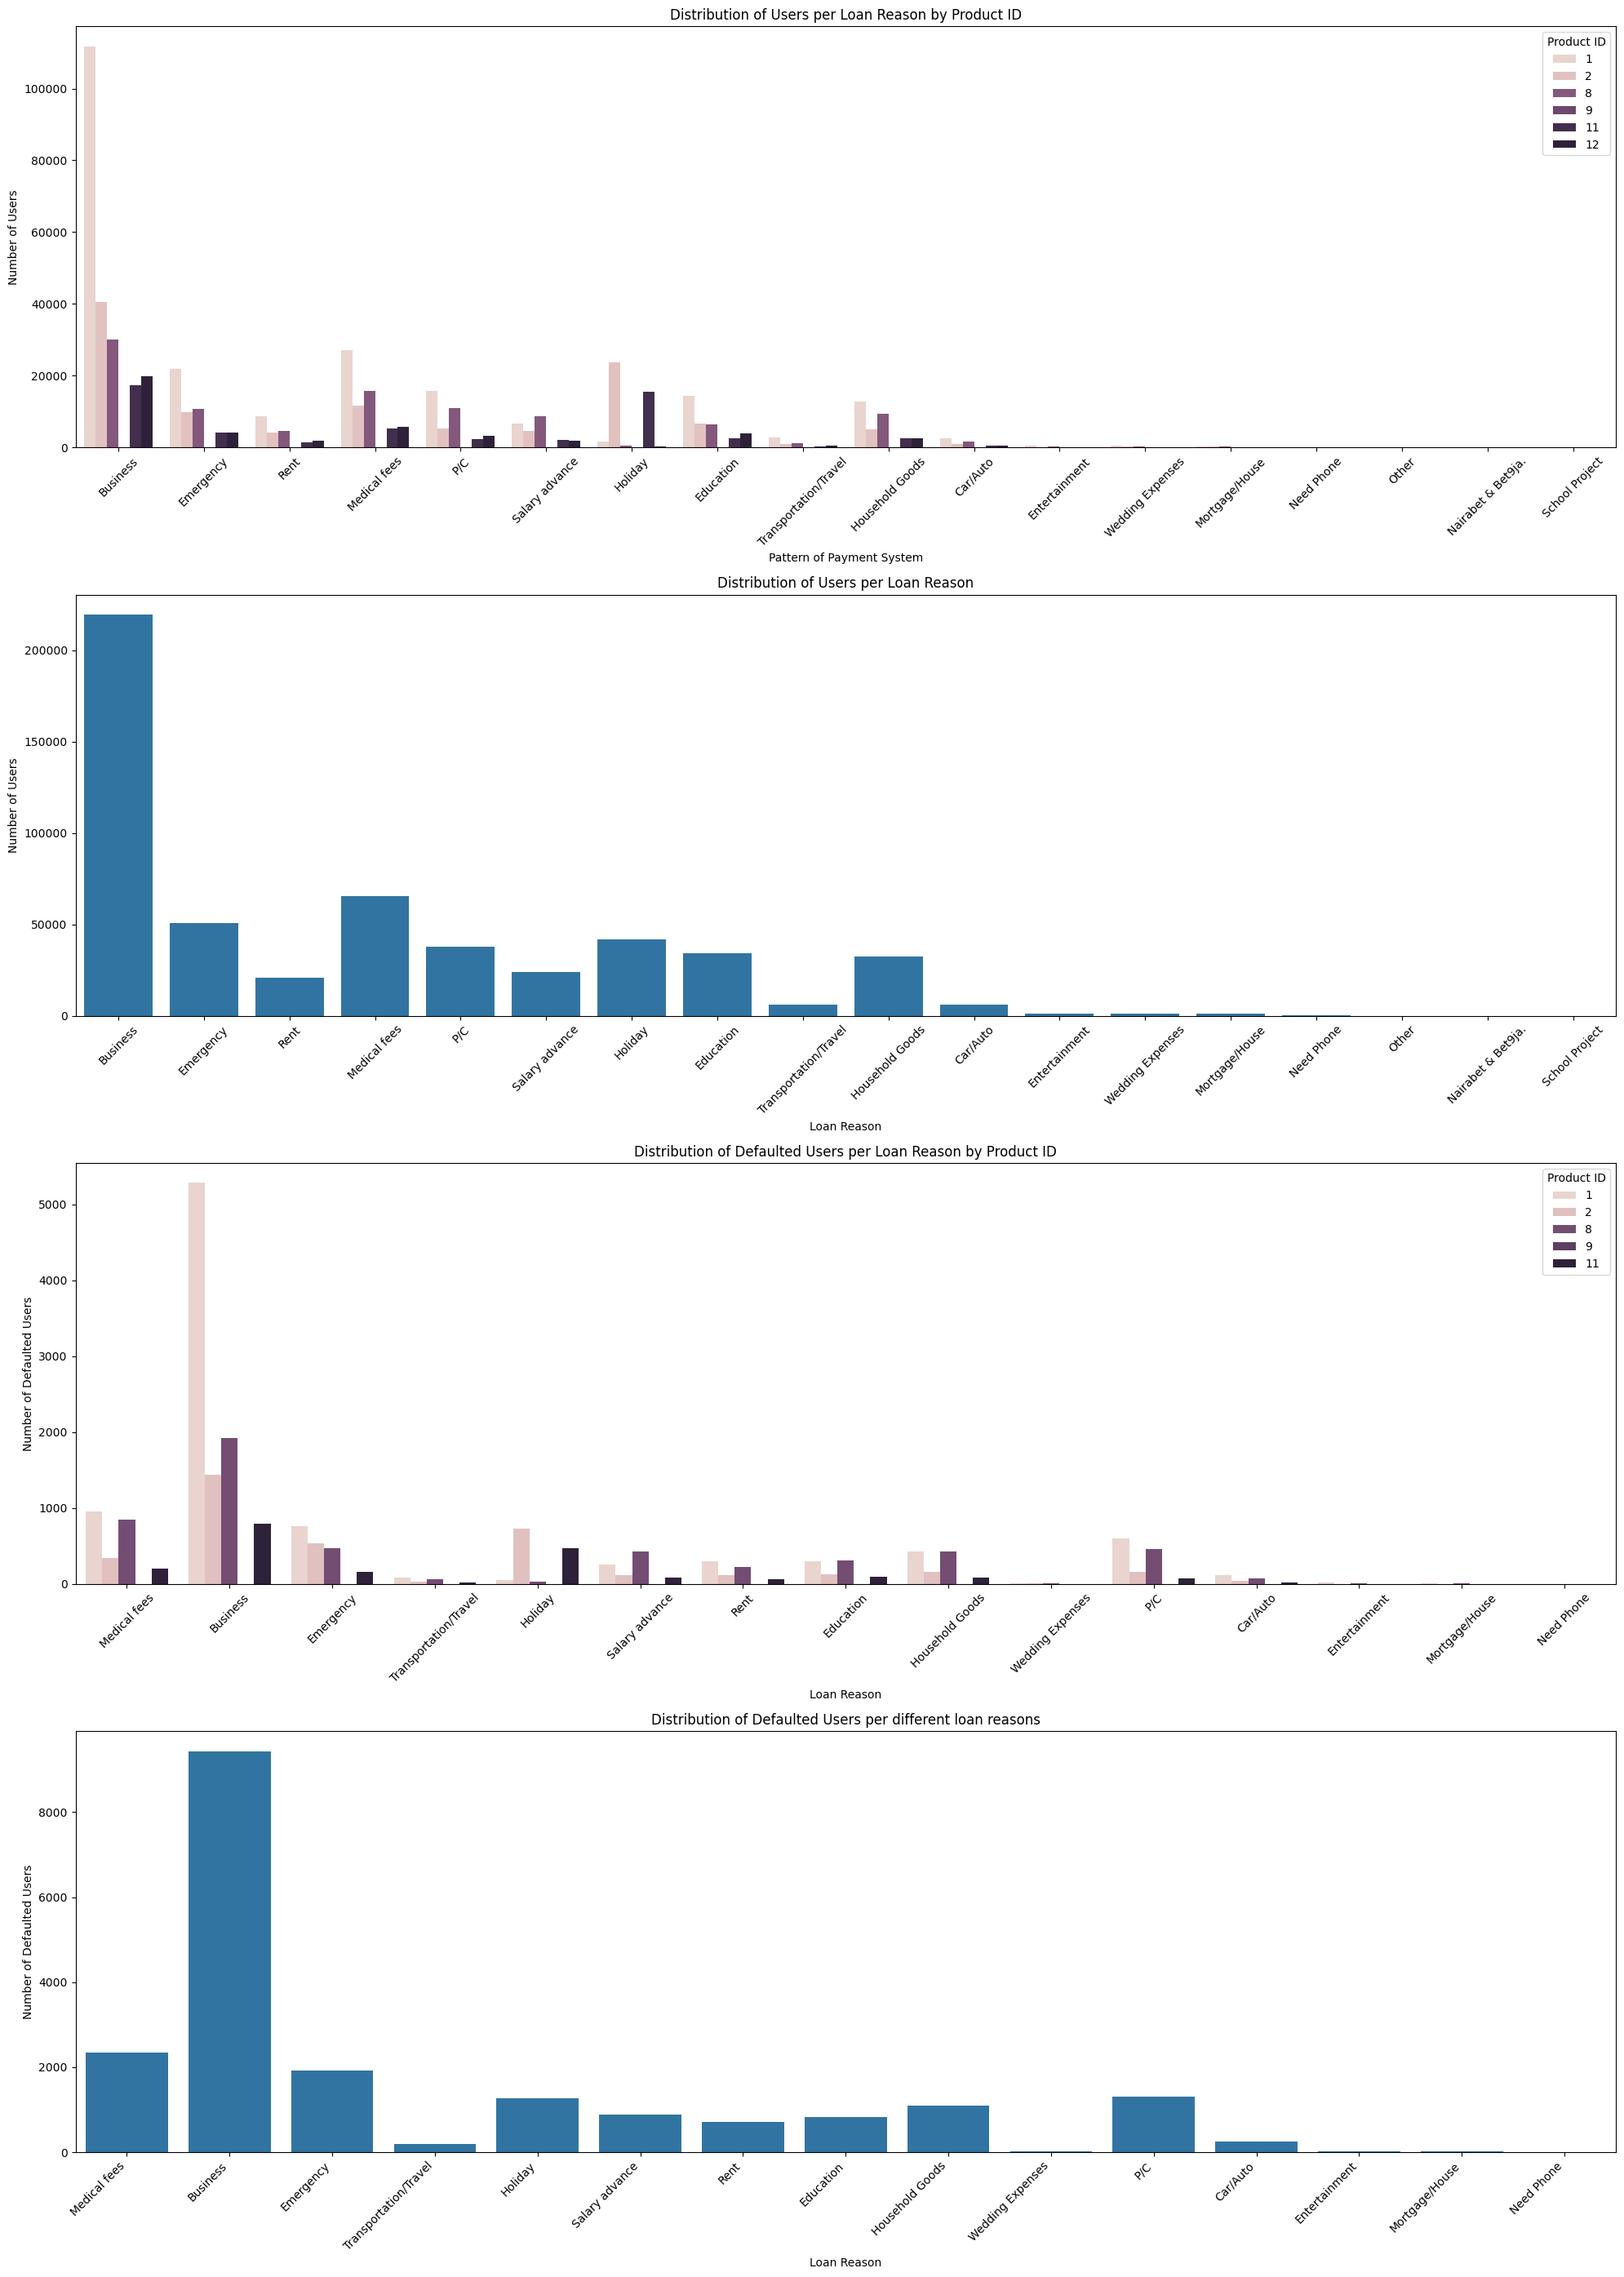

In [69]:
plt.figure(figsize=(20, 28))

# Plot 1: Distribution of Users Across Various Loan Reasons by Product ID
plt.subplot(4, 1, 1)
sns.countplot(x='loan_reason', hue='product_id', data = bothc_df)
plt.title('Distribution of Users per Loan Reason by Product ID')
plt.xlabel("Pattern of Payment System")
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Product ID', loc='upper right')

# Plot 2: Distribution of Users Across Various Loan Reasons
plt.subplot(4, 1, 2)
sns.countplot(x='loan_reason', data = bothc_df)
plt.title('Distribution of Users per Loan Reason')
plt.xlabel('Loan Reason')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# Plot 3: Distribution of Defaulted Users Across Various Loan Reasons by Product ID
plt.subplot(4, 1, 3)
sns.countplot(x='loan_reason', hue='product_id', data=bothc_df[bothc_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users per Loan Reason by Product ID')
plt.xlabel("Loan Reason")
plt.ylabel('Number of Defaulted Users')
plt.legend(title='Product ID', loc='upper right')
plt.xticks(rotation=45)

# Plot 4: Distribution of Defaulted Users For different types of loan reasons
plt.subplot(4, 1, 4)
sns.countplot(x='loan_reason', data=bothc_df[bothc_df['loan_status'] == "DEFAULTED"])
plt.title('Distribution of Defaulted Users per different loan reasons')
plt.xlabel('Loan Reason')
plt.ylabel('Number of Defaulted Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

##### Observation: Many users accessed one or more products for mostly business purposes and this is where the most users defaulted in payment as well. Another imporatant loan reason is the collection of credit for medical fees.

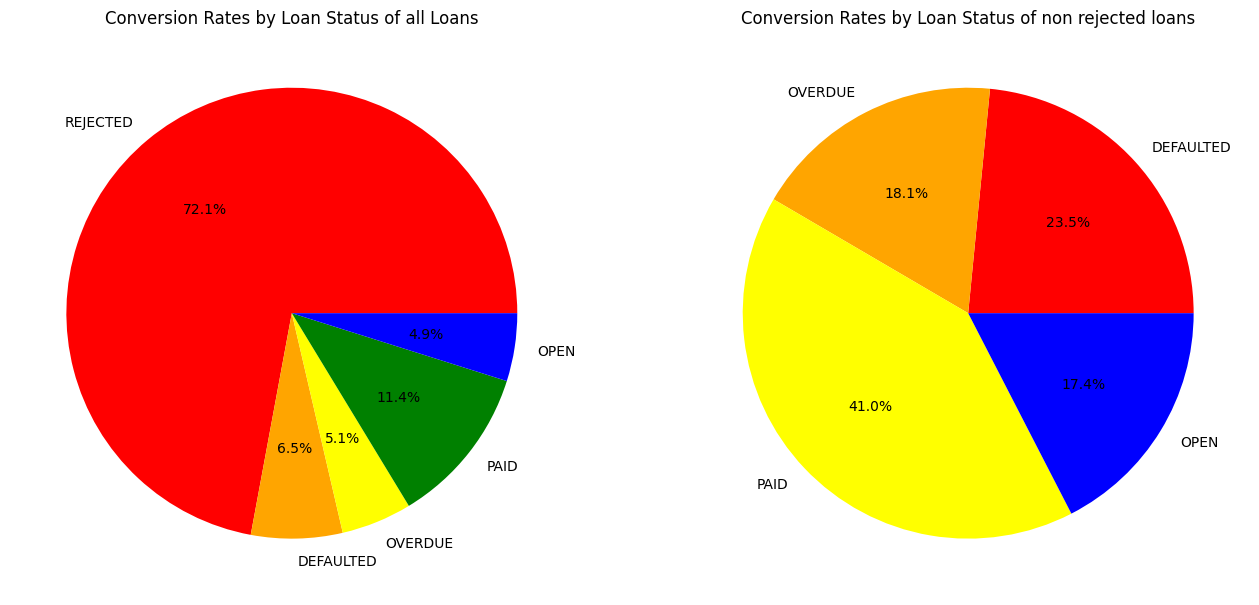

In [70]:
total_loan_status_df = pd.DataFrame(list(conversion_rates.items()), columns=['Loan Status', 'Conversion Rate'])

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.pie(total_loan_status_df['Conversion Rate'], 
        labels=total_loan_status_df['Loan Status'], 
        autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Conversion Rates by Loan Status of all Loans')

plt.subplot(1, 2, 2)  
filtered_df = total_loan_status_df[total_loan_status_df['Loan Status'].isin(['DEFAULTED', 'OVERDUE', 'OPEN', 'PAID'])]
plt.pie(filtered_df['Conversion Rate'], 
        labels=filtered_df['Loan Status'], 
        autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'blue'])
plt.title('Conversion Rates by Loan Status of non rejected loans')

plt.show()

##### Observations: Paid loan status has a conversion rate of 41.0% of total approved credits, indicating successful repayment and good performance but there is still room for improvement. With 23.5% of defaulted loans. The customers that fall within this category contribute largely mainly to the default risk the organization faces and these customers should be followed up with by the account managers to pay their obligations. Quick check stands at an approximate of 59% exposure currently. 

### MACHINE LEARNING 

In [71]:
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.impute import SimpleImputer # Because of the NaN values in some columns still present, use this handle the NaN values
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [97]:
selected_range = bothc_df[['professional_category', 'education_status', 'payment_system', 'loan_status', 'balance', 'defauted']]
selected_range.head()

,professional_category,education_status,payment_system,loan_status,balance,defauted
0,2.0,1.0,3,REJECTED,1000,0
1,6.0,2.0,3,PAID,0,0
2,0.0,2.0,3,REJECTED,2000,0
3,6.0,2.0,1,OPEN,1600,0
4,4.0,2.0,3,PAID,0,0


In [100]:
filtered_data = selected_range[selected_range['loan_status'] == 'DEFAULTED']
filtered_data.head()

,professional_category,education_status,payment_system,loan_status,balance,defauted
16,7.0,2.0,3,DEFAULTED,2000,2000
22,3.0,1.0,3,DEFAULTED,2400,2400
52,6.0,1.0,3,DEFAULTED,2411,2411
84,2.0,2.0,3,DEFAULTED,2000,2000
88,0.0,1.0,3,DEFAULTED,700,700


In [107]:
X = filtered_data[['professional_category', 'education_status', 'payment_system', 'balance']] 
y = filtered_data['defauted']  # Assuming 'defauted' is the target column

print("Dimension of X", X.shape)
print("Dimension of y", y.shape)

Dimension of X (20312, 4)
Dimension of y (20312,)


In [108]:
correlation_matrix = selected_range.corr()
correlation_matrix

<ipython-input-108-b878ab275154>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_range.corr()


,professional_category,education_status,payment_system,balance,defauted
professional_category,1.000000,-0.033660,0.021429,-0.041882,-0.008925
education_status,-0.033660,1.000000,-0.018241,0.026812,0.008697
payment_system,0.021429,-0.018241,1.000000,-0.046853,0.021808
balance,-0.041882,0.026812,-0.046853,1.000000,0.127910
defauted,-0.008925,0.008697,0.021808,0.127910,1.000000


In [109]:
# When the loan status only reads defaulted
correlation_matrix2 = filtered_data.corr()
correlation_matrix2

<ipython-input-109-d0476d328af6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = filtered_data.corr()


,professional_category,education_status,payment_system,balance,defauted
professional_category,1.000000,-0.047991,NaN,-0.034314,-0.035840
education_status,-0.047991,1.000000,NaN,0.058834,0.062436
payment_system,NaN,NaN,NaN,NaN,NaN
balance,-0.034314,0.058834,NaN,1.000000,0.889845
defauted,-0.035840,0.062436,NaN,0.889845,1.000000


##### Observation: From the first correlation taking all the loan status into consideration, it is observed that the balance although having a weak correlation, has relatively the highest chances of being correlated with the defaulted variable. In the second matrix, taking only the defaulted loan status into consideration, it is observed that the balance has a close relation to the defauted variable. Payment system has nothing to do with why the loan repayment was defaulted.

##### Diversion of monthly income is also another reason of why loan repayment was defaulted.
##### If a customer defaulted on repayment for 0-30 days, account can be classified under performing, 30-90 days - watchlist, 91-180 days - substandard, 181-360 days - doubtful and greater thab 360 days - lost. When an account is within substandard - doubtful with a large credit or various credit products, the customer may be falling into a high risk category customer.  

#### CONCLUSION: 
##### It is observed that one user can access one or more credit product. 
##### A large percentage of 72.1% loans have been rejected because customers did not meet one or more of the 5C's of credit. 
##### Business purposed loans have more impact on credit risk than any other loan reason type loan and Product 1 has the highest conversion rate and product id 9 has the lowest. 
##### Education status 2 and payment pattern  3 have greater impact also in comparison to othe loan type in their various categories.
##### 3.89% of the total principal amount is in default but not yet overdue. And 3.57% of the total principal amount is overdue. 
##### Quick check stands at an approximate of 59% exposure currently. 
##### It is wise to monitor the balance and the monthly income of the customer to prevent the credit repayment being defaulted. 

#### CLOSING REMARKS

##### This data is not the best for analysis. Better credit analysis can be made: 
##### 1) if the data tells us more about the repayment amount per period. And if the customer has met up with that obligation. This way the customer can be classified if they are fit or not to even request for the approved amount.
##### 2) If the data were normalized based on the repayment schedule (periods and matured/maturing obligations). 
##### 3) The principal, balance, defaulted, repaid and interest columns were not correlating. See reason after point 6
##### 4) A monthly income of 8le15 for one account is not possible even for a business if the account is a naira account. It is assumed that this is a system error that is why it could not be used for analysis and testing. 
##### 5) There should be a clear distinction between defaulted amount and if the loan is defaulting. If the loan is performing, the corresponding defaulted variable should be 0. If the loan is paid, the corresponding defaulted variable should be also be 0. If the loan the loan is open, it means it is running and not neccessarily mean it is defaulted.  This was not the case as defaulted loans along with paid loans had "defaulted" amounts in this Case study hence the difficulty to uncover accurate insights. 
##### 6) In some cases in the case study, the defaulted variable is greatr than the balance which should not be so if we are assuming the balance to be the exposure. Also when a loan is overdue, it ought to have some defaulted amount. This was not the case for some credits with "overdue" loan status. 
##### Unless the defaultedIn some cases, the defaulted variable is greatr than the balance which should not be so if we are assuming the balance to be the exposure.  or overdue amounts is supposed to be balances then we will have to drop some rows which have balances while loan status reads "paid". 
##### If customer gets an approval of 1Million naira line and draws 500,000 and his obligation is 41,667 per month, but due to one issue or another he could not meet full repayment and could only meet 30,000, then the approved amount should be 1Million, principal variable should be 500,000, interest rate should be stated OR assume monthly interest amount 7500, corresponding repaid variable should be 30,000, defaulted variable should be 27,500, balance variable should be 27,500.

### Author:
#### Ugochi Ihenacho

##### Date: 6th November 2023 to 9th November 2023.